# The MNIST dataset

In [3]:
import mxnet as mx
from mxnet import nd,autograd
import numpy as np

import matplotlib.pyplot as plt

ctx = mx.cpu()

def transform(data,label):
    return data.astype(np.float32)/255, label.astype(np.float32)

mnist_train = mx.gluon.data.vision.MNIST(train=True)
mnist_test = mx.gluon.data.vision.MNIST(train=False, transform=transform)

# Load the data iterator

(28, 28, 1)


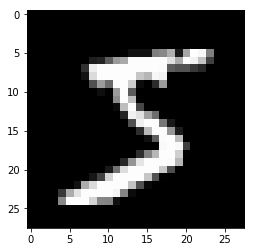

'\nfor data,label in enumerate(train_data):\n    print(data,label)\n    break\n'

In [4]:
num_inputs = 784
num_outputs = 10

image,label = mnist_train[0]
#print(image.shape,label)
#print(type(image))
print(image.shape)

import matplotlib.pyplot as plt

#tile:Repeats the whole array multiple times.
image = mx.nd.tile(image,(1,1,3))
plt.imshow(image.asnumpy())
plt.show()

batch_size = 64

train_data = mx.gluon.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True)
test_data = mx.gluon.data.DataLoader(mnist_test,batch_size= batch_size,shuffle=False)

'''
for data,label in enumerate(train_data):
    print(data,label)
    break
'''

    

# allocate model parameter

In [5]:
W = nd.random_normal(shape=(num_inputs,num_outputs),ctx=ctx)
b = nd.random_normal(shape=num_outputs,ctx=ctx)

params = [W,b]

for param in params:
    param.attach_grad()

# Multiclass logistic regression

In [61]:
def softmax(y_linear):
    exp = nd.exp(y_linear - nd.max(y_linear))
    norms = nd.sum(exp,axis=0,exclude=True).reshape((-1,1))
    return exp / norms

sample_y_linear = nd.random_normal(shape=(2,10))
sample_y_that = softmax(sample_y_linear)
print(sample_y_that)

print(nd.sum(sample_y_that,axis=1))


[[ 0.12113969  0.07064492  0.01608945  0.02748089  0.24389938  0.1270262
   0.17320405  0.0181939   0.03753353  0.16478802]
 [ 0.33536705  0.05266357  0.06890295  0.12002964  0.07864172  0.0466875
   0.04330213  0.05244924  0.06659903  0.13535717]]
<NDArray 2x10 @cpu(0)>

[ 1.  1.]
<NDArray 2 @cpu(0)>


In [59]:
#sum ex
ndarray = nd.arange(6).reshape((2,3))
print(ndarray)

print(nd.sum(ndarray,axis=0))

#nd.sum(ndarray,axis=1).reshape((-1,1))
# exclude 让 axis =1变成 axis =0
nd.sum(ndarray,axis=0,exclude=True).reshape((-1,1))


[[ 0.  1.  2.]
 [ 3.  4.  5.]]
<NDArray 2x3 @cpu(0)>

[ 3.  5.  7.]
<NDArray 3 @cpu(0)>



[[  3.]
 [ 12.]]
<NDArray 2x1 @cpu(0)>

# Define the model

In [56]:
def net(X):
    y_linear = nd.dot(X,W) + b
    yhat = softmax(y_linear)
    
    return yhat

# Define the cross-entropy function

[关于交叉熵的详细讲解](http://blog.csdn.net/rtygbwwwerr/article/details/50778098)

In [62]:

def crosss_entroy(yhat,y):
    retrun -nd.sum(y * nd.log(yhat),axis=0,exclude=True)


# Optimizer

In [76]:
def SGD(params,lr):
    for param in params:
        param[:] = param - lr * param.grad

# Write the evaluation loop to calculate accuracy 

# Execute training loop

# Using the model for prediction 